In [1]:
line(x) = 2 * x + 5

line (generic function with 1 method)

In [2]:
X = 1:5

1:5

In [3]:
Y = line.(X)

5-element Vector{Int64}:
  7
  9
 11
 13
 15

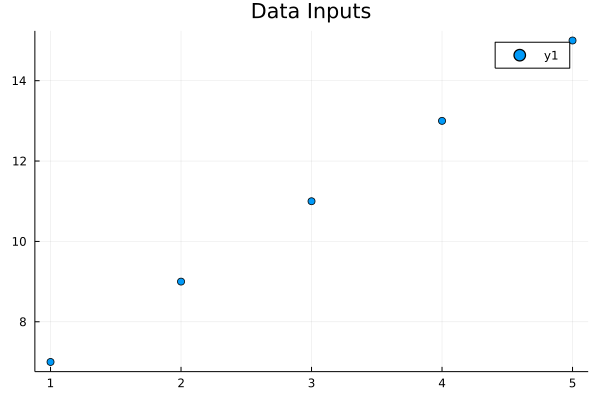

In [4]:
using Plots
scatter(X, Y, title = "Data Inputs")

In [5]:
function error(m, c, inputs, outputs)
    total_error = 0
    for (x, y) in zip(inputs, outputs)
        total_error += abs((m * x + c) - y)  
    end
    total_error / length(inputs)
end

error (generic function with 1 method)

In [6]:
error(0, 0, X, Y)

11.0

In [7]:
sum(Y) / length(Y)

11.0

In [8]:
error(1, 2, X, Y)

6.0

In [14]:
using Plots

function fn()

    line(x) = (3 * x) + 5
    m = rand(1:10)
    c = rand(1:10)
    α = 0.01
    X = 1:5
    Y = line.(X)

    @gif for i in 1:500
        current_error = error(m, c, X, Y)

        hot_m = m + α
        cold_m = m - α
        if current_error > error(hot_m, c, X, Y)
            m = hot_m
        elseif current_error > error(cold_m, c, X, Y)
            m = cold_m
        end

        current_error = error(m, c, X, Y)
        hot_c = c + α
        cold_c = c - α
        if current_error > error(m, hot_c, X, Y)
            c = hot_c
        elseif current_error > error(m, cold_c, X, Y)
            c = cold_c
        end

        if (i % 5) == 0 # let's plot only one out of 5 values
            p = scatter(X, Y)
            line_points = [m * x + c for x in X]
            plot!(p, X, line_points, ylims = (0, 25), xlims=(0, 6))
        end
    end
end

fn (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /Users/mindaslab/code/datascience_book_code/tmp.gif
└ @ Plots /Users/mindaslab/.julia/packages/Plots/9C6z9/src/animation.jl:114


Plots.AnimatedGif("/Users/mindaslab/code/datascience_book_code/tmp.gif")
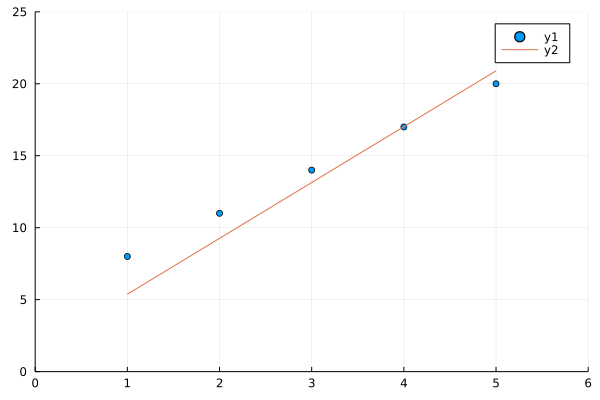

In [16]:
fn()

In [17]:
(m, c)

(8, 2)